## 3.3.3 Bayesian Optimization

Bayesian Optimization is a powerful technique for hyperparameter tuning that builds a probabilistic model of the objective function and uses it to select the most promising hyperparameters to evaluate next. Unlike Grid Search and Random Search, which do not consider past evaluations, Bayesian Optimization leverages previous results to make informed decisions about the next set of hyperparameters to test. This approach can be more efficient and effective, especially when evaluating the objective function is computationally expensive.

### Bayesian Optimization Algorithm Steps

1. **Define the Search Space**: Specify the range or distribution for each hyperparameter to be optimized.

2. **Surrogate Model**: Choose a probabilistic model (usually a Gaussian Process) to approximate the objective function.

3. **Acquisition Function**: Select an acquisition function to balance exploration and exploitation. Common choices include Expected Improvement (EI), Probability of Improvement (PI), and Upper Confidence Bound (UCB).

4. **Iterative Optimization**:
   - Fit the surrogate model to the data collected so far.
   - Use the acquisition function to select the next set of hyperparameters to evaluate.
   - Evaluate the objective function with the chosen hyperparameters.
   - Update the surrogate model with the new data.
   - Repeat until convergence or a stopping criterion is met.

Bayesian Optimization is particularly useful for optimizing functions that are expensive to evaluate, as it aims to find the global optimum with as few evaluations as possible.

### Implementation

We will implement Bayesian Optimization to optimize hyperparameters for a Support Vector Machine (SVM) and a Random Forest classifier on a classification dataset. We will use the `scikit-optimize` library, which provides a convenient implementation of Bayesian Optimization.


## Readings:
- [Unleashing the Power of Multi-fidelity Bayesian Optimization for Hyperparameter Tuning](https://readmedium.com/en/https:/medium.com/codex/unleashing-the-power-of-multi-fidelity-bayesian-optimization-for-hyperparameter-tuning-3ada05a1712d)
- [Bayesian Optimization Algorithm](https://serokell.medium.com/bayesian-optimization-algorithm-08474c026574)
- [Hyperparameter Tuning With Bayesian Optimization](https://heartbeat.comet.ml/hyperparameter-tuning-with-bayesian-optimization-973a5fcb0d91)
- [This approach outperforms both Grid search and Randomized Search](https://readmedium.com/en/https:/medium.com/@ali.soleymani.co/stop-using-grid-search-or-random-search-for-hyperparameter-tuning-c2468a2ff887)

### Installation:
- Jupyter Notebook
```python
    !pip install scikit-optimize
```
- Python terminal
```python
    pip install scikit-optimize
```

<hr><hr>

## 1. SVM

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import matplotlib.pyplot as plt

In [2]:
import warnings

# Turn off warnings
warnings.filterwarnings("ignore")

In [3]:
# Generate synthetic classification data
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=2.0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Define the parameter space for SVM
param_space_svm = {
    'C': Real(1e-3, 1e+3, prior='log-uniform'),
    'gamma': Real(1e-3, 1e+1, prior='log-uniform'),
    'kernel': Categorical(['linear', 'poly', 'rbf']),
    'degree': Integer(1, 4),
    'coef0': Real(0.0, 5.0)
}


In [5]:
# Initialize the SVM classifier
svm = SVC()

# Initialize the Bayesian Search for SVM
bayes_search_svm = BayesSearchCV(svm, param_space_svm, n_iter=20, cv=3, scoring='accuracy', random_state=42)

# Perform Bayesian Optimization for SVM
bayes_search_svm.fit(X_train, y_train)

# Best hyperparameters for SVM
best_params_svm = bayes_search_svm.best_params_
print(f"Best Parameters for SVM: {best_params_svm}")

Best Parameters for SVM: OrderedDict([('C', 0.46665408703686484), ('coef0', 4.593612608346885), ('degree', 1), ('gamma', 0.054116687755186035), ('kernel', 'linear')])


SVM Test Set Accuracy: 0.9666666666666667


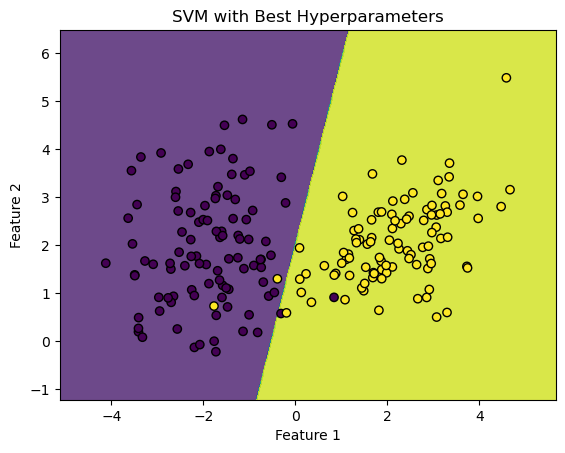

In [6]:
# Train the model with the best hyperparameters for SVM
best_svm = bayes_search_svm.best_estimator_

# Predict on the test set for SVM
y_pred_svm = best_svm.predict(X_test)

# Evaluate the model for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Test Set Accuracy: {accuracy_svm}")

# Visualization of the decision boundary for SVM

# Create a mesh grid for plotting
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundary for SVM
Z_svm = best_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z_svm = Z_svm.reshape(xx.shape)
plt.contourf(xx, yy, Z_svm, alpha=0.8)

# Plot training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title('SVM with Best Hyperparameters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

<hr><hr>

## 2. Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter space for Random Forest
param_space_rf = {
    'n_estimators': Integer(10, 200),
    'max_features': Categorical(['auto', 'sqrt', 'log2']),
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20),
    'bootstrap': Categorical([True, False])
}

In [8]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Initialize the Bayesian Search for Random Forest
bayes_search_rf = BayesSearchCV(rf, param_space_rf, n_iter=20, cv=3, scoring='accuracy', random_state=42)

# Perform Bayesian Optimization for Random Forest
bayes_search_rf.fit(X_train, y_train)

# Best hyperparameters for Random Forest
best_params_rf = bayes_search_rf.best_params_
print(f"Best Parameters for Random Forest: {best_params_rf}")

Best Parameters for Random Forest: OrderedDict([('bootstrap', False), ('max_depth', 44), ('max_features', 'auto'), ('min_samples_leaf', 19), ('min_samples_split', 18), ('n_estimators', 22)])


In [9]:
# Train the model with the best hyperparameters for Random Forest
best_rf = bayes_search_rf.best_estimator_

# Predict on the test set for Random Forest
y_pred_rf = best_rf.predict(X_test)

# Evaluate the model for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Set Accuracy: {accuracy_rf}")

Random Forest Test Set Accuracy: 0.9666666666666667


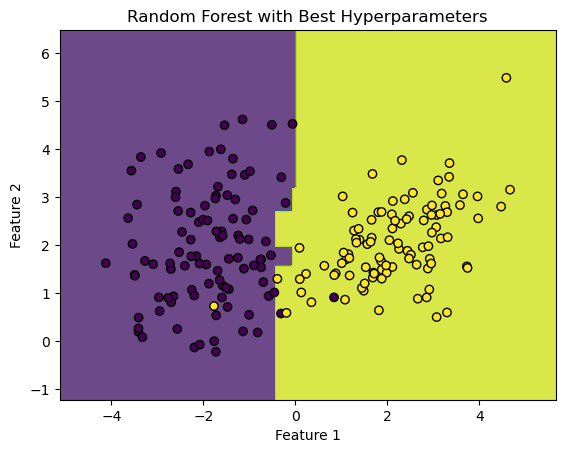

In [10]:
# Visualization of the decision boundary for Random Forest

# Plot decision boundary for Random Forest
Z_rf = best_rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rf = Z_rf.reshape(xx.shape)
plt.contourf(xx, yy, Z_rf, alpha=0.8)

# Plot training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title('Random Forest with Best Hyperparameters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Conclusion

Bayesian Optimization is an advanced hyperparameter optimization technique that intelligently explores the hyperparameter space by leveraging a probabilistic model and an acquisition function. In our implementation, we used Bayesian Optimization to tune hyperparameters for both Support Vector Machine (SVM) and Random Forest classifiers on a synthetic classification dataset. The results demonstrated improved model performance, highlighting the effectiveness of Bayesian Optimization in finding optimal hyperparameters with fewer evaluations compared to traditional methods like Grid Search and Random Search.
